In [ ]:
# I will adjust the given code to answer the question based on the image provided by the user.

def calculate_smm(pre_payments, beginning_outstanding_principal):
    """
    Single Monthly Mortality (SMM).

    pre_payments: The total prepayments for the month.
    beginning_outstanding_principal: The outstanding principal at the beginning of the month.
    return: The SMM for the month.
    """
    smm = pre_payments / beginning_outstanding_principal
    return smm

# Inputs based on the question
# 10mm in prepayments over the course of the 12-month period
monthly_pre_payments = 10e6 / 12  # $10mm annual prepayments divided by 12 to get monthly prepayments
beginning_outstanding_principal = 100e6  # $100mm

# Calculations
smm = calculate_smm(monthly_pre_payments, beginning_outstanding_principal)

# Displaying the SMM as a percentage
smm_percentage = smm * 100
smm_percentage


0.8333333333333334

In [ ]:
# Calculation of SMM increase for each pool

# Function to calculate SMM from CPR
def calculate_smm(cpr):
    return 1 - (1 - cpr)**(1/12)

# CPR values for each pool before and after increase
cpr_values = {
    'A': {'before': 0.05, 'after': 0.10},
    'B': {'before': 0.20, 'after': 0.25},
    'C': {'before': 0.40, 'after': 0.45},
    'D': {'before': 0.60, 'after': 0.65}
}

# Calculate the SMM for each pool before and after the CPR increase
smm_values = {pool: {'before': calculate_smm(data['before']), 'after': calculate_smm(data['after'])}
              for pool, data in cpr_values.items()}

# Calculate the increase in SMM for each pool
smm_increase = {pool: data['after'] - data['before'] for pool, data in smm_values.items()}

smm_increase


{'A': 0.004476292177136076,
 'B': 0.00526495409635841,
 'C': 0.0069236296288957,
 'D': 0.010252419653275613}

In [ ]:
# Given values for the bond
coupon_rate = 0.04  # 4%
maturity_value = 1000  # Assuming a face value of $1000
yield_to_maturity = 0.02  # 2%
years_to_maturity = 3  # 3 years to maturity

# Calculate annual coupon payment
annual_coupon_payment = maturity_value * coupon_rate

# Calculate the current market price of the bond (P)
market_price = sum([annual_coupon_payment / (1 + yield_to_maturity)**t for t in range(1, years_to_maturity+1)]) \
               + maturity_value / (1 + yield_to_maturity)**years_to_maturity

# Calculate the Macaulay duration (D)
macaulay_duration = sum([t * annual_coupon_payment / (1 + yield_to_maturity)**t for t in range(1, years_to_maturity+1)]) \
                    + years_to_maturity * maturity_value / (1 + yield_to_maturity)**years_to_maturity

macaulay_duration /= market_price

market_price, macaulay_duration


(1057.6776654529554, 2.88949551681373)

In [ ]:
import numpy as np

# Constants for the problem
principal = 50e6  # Principal amount for the Front Sequential
months = 360  # Total number of months for a 30-year mortgage

# Calculating the average life assuming no prepayments
# With no prepayments, the principal is paid evenly over the life of the security.
# Therefore, the average life is simply the midpoint of the amortization period.

average_life_no_prepayments = np.average(np.arange(1, months + 1), weights=np.ones(months) * (principal/months))

print (f'Average Life with no Prepayments: {average_life_no_prepayments:.2f}')


Average Life with no Prepayments: 180.50


In [ ]:
import numpy as np

def years_and_months(months):
    full_years = int(months // 12)  # Get the full years as an integer
    remaining_months = int(months % 12)  # Calculate the remaining months
    return full_years, remaining_months

# Constants for the problem
principal = 50e6  # Principal amount for the Front Sequential
total_months = 360  # Total number of months for a 30-year mortgage

# Calculating the average life assuming no prepayments
# With no prepayments, the principal is paid evenly over the life of the security.
# Therefore, the average life is simply the midpoint of the amortization period.

average_life_no_prepayments_months = np.average(np.arange(1, total_months + 1), weights=np.ones(total_months) * (principal/total_months))
average_life_no_prepayments_years, average_life_no_prepayments_remain_months = years_and_months(average_life_no_prepayments_months)

print (f'Average life: {average_life_no_prepayments_years} years and {average_life_no_prepayments_remain_months} months')


Average life: 15 years and 0 months


In [ ]:
import numpy as np

def years_and_months(months):
    full_years = int(months // 12)  # Get the full years as an integer
    remaining_months = int(months % 12)  # Calculate the remaining months
    return full_years, remaining_months

# Constants for the problem
cpr = 0.06  # Constant prepayment rate of 6%

# Convert the annual CPR to a monthly SMM
smm = 1 - (1 - cpr)**(1/12)

# Initialize variables
remaining_principal = principal  # Start with the full principal
monthly_payment = remaining_principal / months  # Assuming no prepayment for initial calculation
cash_flows = np.zeros(months)  # Array to hold the monthly principal payments

# Calculate the monthly principal payments considering prepayments
for month in range(months):
    # Calculate the prepayment for the current month
    prepayment = remaining_principal * smm

    # Calculate the total principal payment for the current month
    total_principal_payment = monthly_payment + prepayment
    cash_flows[month] = total_principal_payment

    # Update the remaining principal
    remaining_principal -= total_principal_payment

    # Recalculate the monthly payment for the remaining months
    remaining_months = months - month - 1
    if remaining_months > 0:
        monthly_payment = remaining_principal / remaining_months
    else:
        break

# Calculate the weighted average life of the cash flows
average_life_with_cpr = np.average(np.arange(1, months + 1), weights=cash_flows)

average_life_with_cpr
print (f'Average Life with Prepayments: {average_life_with_cpr:.2f}')



Average Life with Prepayments: 106.10


In [ ]:
import numpy as np

def years_and_months(months):
    full_years = int(months // 12)  # Get the full years as an integer
    remaining_months = int(months % 12)  # Calculate the remaining months
    return full_years, remaining_months

# Constants for the problem
principal = 50e6  # Principal amount
months = 360  # Total number of months for a 30-year mortgage
cpr = 0.06  # Constant prepayment rate of 6%

# Convert the annual CPR to a monthly SMM
smm = 1 - (1 - cpr)**(1/12)

# Initialize variables
remaining_principal = principal  # Start with the full principal
monthly_payment = remaining_principal / months  # Assuming no prepayment for initial calculation
cash_flows = np.zeros(months)  # Array to hold the monthly principal payments

# Calculate the monthly principal payments considering prepayments
for month in range(months):
    # Calculate the prepayment for the current month
    prepayment = remaining_principal * smm

    # Calculate the total principal payment for the current month
    total_principal_payment = monthly_payment + prepayment
    cash_flows[month] = total_principal_payment

    # Update the remaining principal
    remaining_principal -= total_principal_payment

    # Recalculate the monthly payment for the remaining months
    remaining_months = months - month - 1
    if remaining_months > 0:
        monthly_payment = remaining_principal / remaining_months
    else:
        break

# Calculate the weighted average life of the cash flows
average_life_with_cpr_months = np.average(np.arange(1, months + 1), weights=cash_flows)

# Use the function to convert months to years and remaining months
years, rem_months = years_and_months(average_life_with_cpr_months)

print(f'Average Life with Prepayments: {years} years and {rem_months} months')


Average Life with Prepayments: 8 years and 10 months


In [17]:
# Let's define the data for Group X and Group Y in a structured way
group_x = [
    {"borrowers": 25, "rate": 6.99, "loan": 600000},
    {"borrowers": 25, "rate": 6.73, "loan": 500000},
    {"borrowers": 25, "rate": 6.7, "loan": 400000},
    {"borrowers": 25, "rate": 6.55, "loan": 100000}
]

group_y = [
    {"borrowers": 25, "rate": 6.5, "loan": 400000},
    {"borrowers": 25, "rate": 6.45, "loan": 350000},
    {"borrowers": 25, "rate": 6.63, "loan": 325000},
    {"borrowers": 25, "rate": 6.9, "loan": 225000}
]

# Function to calculate WAC and corrected WAOLS
def calculate_wac_waols(group):
    total_loan = sum(entry["borrowers"] * entry["loan"] for entry in group)
    weighted_rate_sum = sum(entry["borrowers"] * entry["rate"] * entry["loan"] for entry in group)
    wac = weighted_rate_sum / total_loan

    # Corrected WAOLS calculation: (Sum of each loan size squared) / (Sum of the loan sizes)
    waols = sum(entry["borrowers"] * entry["loan"]**2 for entry in group) / total_loan

    return wac, waols


# Calculate WAC and WAOLS for Group X and Group Y
wac_x, waols_x = calculate_wac_waols(group_x)
wac_y, waols_y = calculate_wac_waols(group_y)

print(f'WAC for X: {wac_x}')
print(f'WAOLS for X: {waols_x}')
print(f'WAC for Y: {wac_y}')
print(f'WAOLS for Y: {waols_y}')


WAC for X: 6.80875
WAOLS for X: 487500.0
WAC for Y: 6.588269230769231
WAOLS for Y: 337500.0


WAC for X: 6.80875
WAOLS for X: 487500.0
WAC for Y: 6.588269230769231
WAOLS for Y: 337500.0


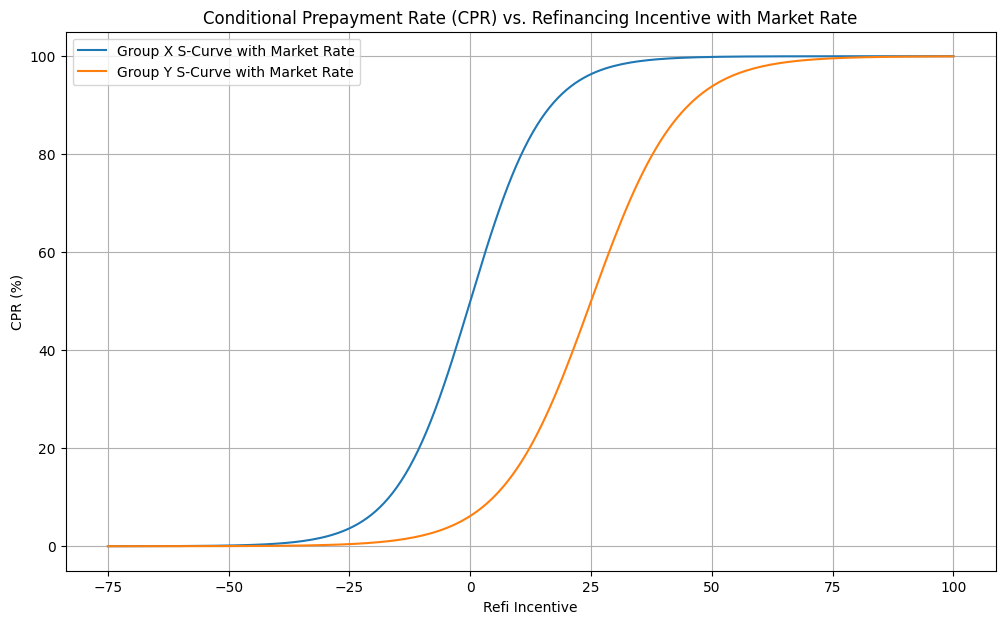

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the data for Group X and Group Y
group_x = [
    {"borrowers": 25, "rate": 6.99, "loan": 600000},
    {"borrowers": 25, "rate": 6.73, "loan": 500000},
    {"borrowers": 25, "rate": 6.7, "loan": 400000},
    {"borrowers": 25, "rate": 6.55, "loan": 100000}
]

group_y = [
    {"borrowers": 25, "rate": 6.5, "loan": 400000},
    {"borrowers": 25, "rate": 6.45, "loan": 350000},
    {"borrowers": 25, "rate": 6.63, "loan": 325000},
    {"borrowers": 25, "rate": 6.9, "loan": 225000}
]

# Function to calculate WAC and corrected WAOLS
def calculate_wac_waols(group):
    total_loan = sum(entry["borrowers"] * entry["loan"] for entry in group)
    weighted_rate_sum = sum(entry["borrowers"] * entry["rate"] * entry["loan"] for entry in group)
    wac = weighted_rate_sum / total_loan

    # Corrected WAOLS calculation: (Sum of each loan size squared) / (Sum of the loan sizes)
    waols = sum(entry["borrowers"] * entry["loan"]**2 for entry in group) / total_loan

    return wac, waols


# Calculate WAC and WAOLS for Group X and Group Y
wac_x, waols_x = calculate_wac_waols(group_x)
wac_y, waols_y = calculate_wac_waols(group_y)

# Printing WAC and WAOLS for both groups
print(f'WAC for X: {wac_x}')
print(f'WAOLS for X: {waols_x}')
print(f'WAC for Y: {wac_y}')
print(f'WAOLS for Y: {waols_y}')

# Market rate given in the initial question
market_rate = 5.5

# Adjusting 'k' values based on WAC relative to the market rate
k_x = (wac_x - market_rate) / 10
k_y = (wac_y - market_rate) / 10

# Example S-curve using a logistic function, adjusted to account for market rate influence
def market_s_curve(incentive, k=1, x0=0, market_rate=5.5):
    return 100 / (1 + np.exp(-k * (incentive - x0)))

# Extended range for the refinancing incentives
extended_refi_incentive = np.linspace(-75, 100, 200)

# Generate the s-curves for both groups, considering market rate influence
cpr_x = market_s_curve(extended_refi_incentive, k_x, 0)  # Group X with market rate influence
cpr_y = market_s_curve(extended_refi_incentive, k_y, 25) # Group Y with market rate influence

# Plot the S-curves
plt.figure(figsize=(12, 7))
plt.plot(extended_refi_incentive, cpr_x, label='Group X S-Curve with Market Rate')
plt.plot(extended_refi_incentive, cpr_y, label='Group Y S-Curve with Market Rate')
plt.title('Conditional Prepayment Rate (CPR) vs. Refinancing Incentive with Market Rate')
plt.xlabel('Refi Incentive')
plt.ylabel('CPR (%)')
plt.legend()
plt.grid(True)
plt.show()


WAC for X: 6.80875
WAOLS for X: 487500.0
WAC for Y: 6.588269230769231
WAOLS for Y: 337500.0


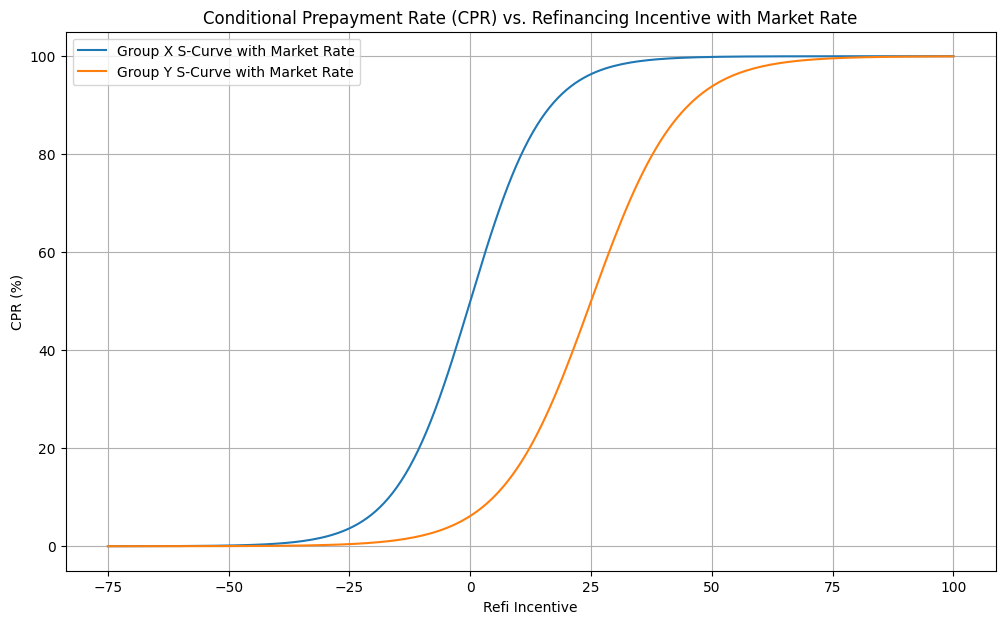

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the data for Group X and Group Y
group_x = [
    {"borrowers": 25, "rate": 6.99, "loan": 600000},
    {"borrowers": 25, "rate": 6.73, "loan": 500000},
    {"borrowers": 25, "rate": 6.7, "loan": 400000},
    {"borrowers": 25, "rate": 6.55, "loan": 100000}
]

group_y = [
    {"borrowers": 25, "rate": 6.5, "loan": 400000},
    {"borrowers": 25, "rate": 6.45, "loan": 350000},
    {"borrowers": 25, "rate": 6.63, "loan": 325000},
    {"borrowers": 25, "rate": 6.9, "loan": 225000}
]

# Function to calculate WAC and corrected WAOLS
def calculate_wac_waols(group):
    total_loan = sum(entry["borrowers"] * entry["loan"] for entry in group)
    weighted_rate_sum = sum(entry["borrowers"] * entry["rate"] * entry["loan"] for entry in group)
    wac = weighted_rate_sum / total_loan

    # Corrected WAOLS calculation: (Sum of each loan size squared) / (Sum of the loan sizes)
    waols = sum(entry["borrowers"] * entry["loan"]**2 for entry in group) / total_loan

    return wac, waols


# Calculate WAC and WAOLS for Group X and Group Y
wac_x, waols_x = calculate_wac_waols(group_x)
wac_y, waols_y = calculate_wac_waols(group_y)

# Printing WAC and WAOLS for both groups
print(f'WAC for X: {wac_x}')
print(f'WAOLS for X: {waols_x}')
print(f'WAC for Y: {wac_y}')
print(f'WAOLS for Y: {waols_y}')

# Market rate given in the initial question
market_rate = 5.5

# Adjusting 'k' values based on WAC relative to the market rate
k_x = (wac_x - market_rate) / 10
k_y = (wac_y - market_rate) / 10

# Example S-curve using a logistic function, adjusted to account for market rate influence
def market_s_curve(incentive, k=1, x0=0, max_cpr=100):
    return max_cpr / (1 + np.exp(-k * (incentive - x0)))


# Extended range for the refinancing incentives
extended_refi_incentive = np.linspace(-75, 100, 200)

# Generate the s-curves for both groups, considering market rate influence
cpr_x = market_s_curve(extended_refi_incentive, k_x, 0)  # Group X with market rate influence
cpr_y = market_s_curve(extended_refi_incentive, k_y, 25) # Group Y with market rate influence

# Plot the S-curves
plt.figure(figsize=(12, 7))
plt.plot(extended_refi_incentive, cpr_x, label='Group X S-Curve with Market Rate')
plt.plot(extended_refi_incentive, cpr_y, label='Group Y S-Curve with Market Rate')
plt.title('Conditional Prepayment Rate (CPR) vs. Refinancing Incentive with Market Rate')
plt.xlabel('Refi Incentive')
plt.ylabel('CPR (%)')
plt.legend()
plt.grid(True)
plt.show()